In [5]:
import pandas as pd
import numpy as np
import glob,os
from glob import iglob
#import scanpy as sc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time
from scipy.io import mmread
from scipy.io import mmwrite
import random
from scipy.sparse import csr_matrix

In [55]:
###bulk data could be accssed through 
#### https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE72509
sle_bulk=pd.read_csv('../RNA_seq_for_autoimmune_disease/SLE_bulk/GSE72509_SLE_RPKMs.txt.gz',sep='\t')
sle_bulk=sle_bulk.set_index('SYMBOL')

In [56]:
features=pd.read_csv('../three_gene_combined_markerset.csv',index_col=1)
features=np.append(features.index.values,'patient')
features=np.delete(features,[9,11,12,13,14,39,83])
sle_sub=sle_bulk.loc[features,:]
sle_part=sle_sub.loc[:,sle_sub.columns.str.startswith('SLE')].T
control_part=sle_sub.loc[:,sle_sub.columns.str.startswith('control')].T
sle_part['patient']='1'
control_part['patient']='0'

Random Forest:0.9166666666666666


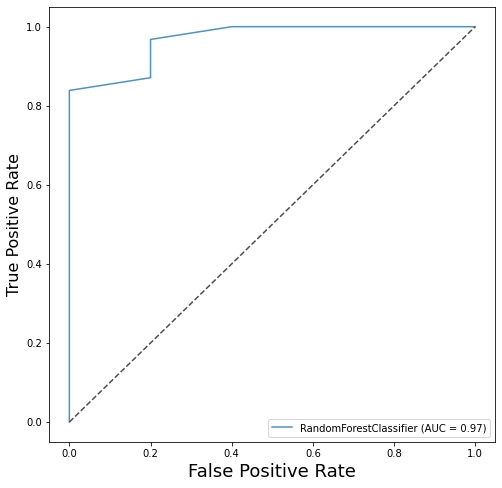

In [65]:
df=pd.concat([sle_part,control_part],axis=0)
label=df.patient.values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.drop(columns=['patient']),label,test_size=0.3)
rfc = RandomForestClassifier(random_state=0,class_weight="balanced")
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
a=pd.DataFrame(rfc.feature_importances_)
#a.index=df.columns.values
print("Random Forest:{}".format(score_r))
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, Xtest, Ytest, ax=ax, alpha=0.8)
plt.legend(loc=4,prop={'size': 10})
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=16)
ax.plot([0, 1], [0, 1], ls="--", c=".3")
plt.show()


In [66]:
###SLE importance
a.index=df.columns.values[0:len(features)]

# RA

Random Forest:0.875


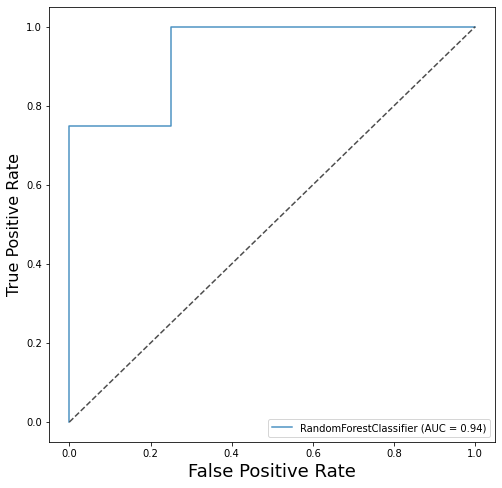

In [25]:
###data can be accessied through https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE90081
ra=pd.read_csv('../RNA_seq_for_autoimmune_disease/RA_bulk/GSE90081/GSE90081_ra_part.csv',index_col=0)
hd=pd.read_csv('../RNA_seq_for_autoimmune_disease/RA_bulk/GSE90081/GSE90081_hd_part.csv',index_col=0)
features=pd.read_csv('../three_gene_combined_markerset.csv',index_col=1)
features=np.append(features.index.values,'patient')
features=np.delete(features,[13,16,31,39,83])
ra_part=ra.loc[features,:].T
hd_part=hd.loc[features,:].T
ra_part['patient']='1'
hd_part['patient']='0'
df=pd.concat([ra_part,hd_part],axis=0)
label=df.patient.values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.drop(columns=['patient']),label,test_size=0.3)
rfc = RandomForestClassifier(random_state=0,class_weight='balanced')
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
c=pd.DataFrame(rfc.feature_importances_)
#a.index=df.columns.values
print("Random Forest:{}".format(score_r))
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, Xtest, Ytest, ax=ax, alpha=0.8)
plt.legend(loc=4,prop={'size': 10})
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=16)
ax.plot([0, 1], [0, 1], ls="--", c=".3")
plt.show()

['TCL1A' 'PPAPDC1B' 'FOS' 'CXCR4' 'SNX29P2' 'AIM2' 'CRIP1' 'TNFRSF13B'
 'ITGB1' 'IGHA1' 'ABCB4' 'IGHD' 'IGHM' 'PLPP5' 'IGLC2' 'CD200' 'BACE2'
 'IL4R' 'OSBPL10-AS1' 'CD27' 'HSPB1' 'RGS2' 'MPP6' 'FCRL5' 'CIB1'
 'S100A12' 'FOSB' 'S100A8' 'RPS4Y1' 'IFI27' 'IFI44L' 'MX1' 'IFI44' 'ISG15'
 'FCGR3A' 'CDKN1C' 'RHOC' 'HES4' 'TCF7L2' 'MTRNR2L12' 'HLA-DQA2'
 'HIST1H1E' 'H1F0' 'PLCG2' 'C15orf48' 'IL1B' 'CCL4' 'THBS1' 'CCL4L2'
 'XIST' 'HBEGF' 'NR4A2' 'TMEM176A' 'TNF' 'CCL3L1' 'IL1R2' 'CD163' 'FKBP5'
 'RETN' 'SAP30' 'C1QA' 'C1QB' 'IL7R' 'LTB' 'CD3D' 'TCF7' 'CD3G' 'ICAM1'
 'ICAM2' 'ITGAL' 'SPN' 'ITGAX' 'ITGAM' 'APP' 'CD74' 'CD47' 'CD36' 'IL16'
 'TNFRSF1A' 'TGFB1' 'TGFBR2' 'SORT1' 'BAG6' 'patient']
Random Forest:0.9444444444444444


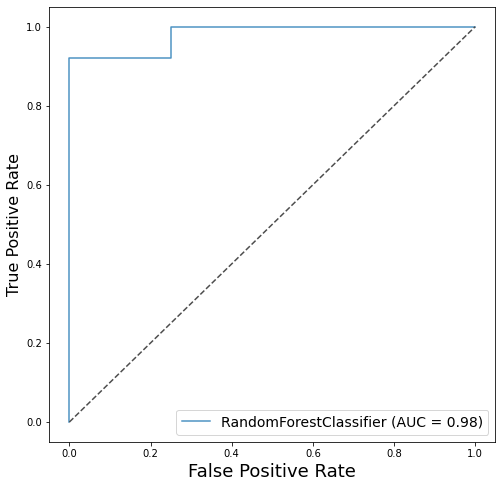

In [38]:
###data can be accessied through https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89408
ra=pd.read_csv('../RNA_seq_for_autoimmune_disease/RA_bulk/GSE89408_GEO_count_matrix_rename.txt.gz',sep='\t',index_col=0)
features=pd.read_csv('../three_gene_combined_markerset.csv',index_col=1)
features=np.append(features.index.values,'patient')

features=np.delete(features,[9,12,13,14,18,39,83])
ra_sub=ra.loc[features,:]
ra_part=ra_sub.loc[:,ra_sub.columns.str.startswith('RA')].T
control_part=ra_sub.loc[:,ra_sub.columns.str.startswith('normal')].T
ra_part['patient']='1'
control_part['patient']='0'
df=pd.concat([ra_part,control_part],axis=0)
label=df.patient.values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.drop(columns=['patient']),label,test_size=0.3)
rfc = RandomForestClassifier(random_state=0,class_weight='balanced')
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
b=pd.DataFrame(rfc.feature_importances_)
#a.index=df.columns.values
print("Random Forest:{}".format(score_r))
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, Xtest, Ytest, ax=ax, alpha=0.8)
plt.legend(loc=4,prop={'size': 14})
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=16)
ax.plot([0, 1], [0, 1], ls="--", c=".3")
plt.show()

In [39]:
##ra importance_part
b.index=df.columns.values[0:len(features)]


# MS

['TCL1A' 'PPAPDC1B' 'FOS' 'CXCR4' 'SNX29P2' 'AIM2' 'CRIP1' 'TNFRSF13B'
 'ITGB1' 'IGHA1' 'ABCB4' 'IGHD' 'IGHM' 'PLPP5' 'IGLC2' 'CD200' 'BACE2'
 'IL4R' 'OSBPL10-AS1' 'CD27' 'HSPB1' 'RGS2' 'MPP6' 'FCRL5' 'CIB1'
 'S100A12' 'FOSB' 'S100A8' 'RPS4Y1' 'IFI27' 'IFI44L' 'MX1' 'IFI44' 'ISG15'
 'FCGR3A' 'CDKN1C' 'RHOC' 'HES4' 'TCF7L2' 'MTRNR2L12' 'HLA-DQA2'
 'HIST1H1E' 'H1F0' 'PLCG2' 'C15orf48' 'IL1B' 'CCL4' 'THBS1' 'CCL4L2'
 'XIST' 'HBEGF' 'NR4A2' 'TMEM176A' 'TNF' 'CCL3L1' 'IL1R2' 'CD163' 'FKBP5'
 'RETN' 'SAP30' 'C1QA' 'C1QB' 'IL7R' 'LTB' 'CD3D' 'TCF7' 'CD3G' 'ICAM1'
 'ICAM2' 'ITGAL' 'SPN' 'ITGAX' 'ITGAM' 'APP' 'CD74' 'CD47' 'CD36' 'IL16'
 'TNFRSF1A' 'TGFB1' 'TGFBR2' 'SORT1' 'BAG6' 'patient']
Random Forest:0.8666666666666667


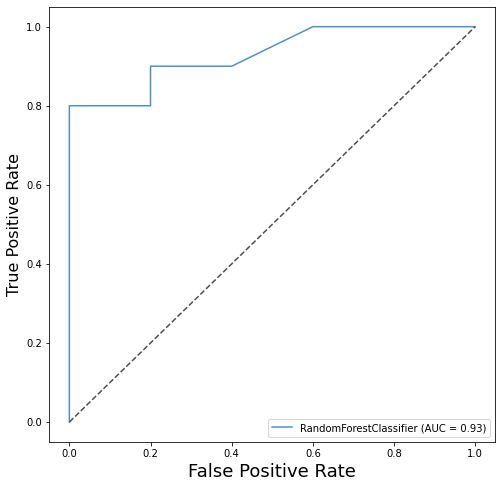

In [53]:
###data can be accessied through https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89408 linearrna read count
data=pd.read_csv('../RNA_seq_for_autoimmune_disease/MS_bulk/GSE159225_DESeq_normalized_data.csv',index_col=0)
features=pd.read_csv('../three_gene_combined_markerset.csv',index_col=1)
features=np.append(features.index.values,'patient')
print(features)
features=np.delete(features,[1,18,83])
data=data.loc[features,:]
control_part=data.loc[:,data.columns.str.startswith('HC')].T
ms_part1=data.loc[:,data.columns.str.startswith('RRMS')].T
ms_part2=data.loc[:,data.columns.str.startswith('SPMS')].T
control_part['patient']='0'
ms_part1['patient']='1'
ms_part2['patient']='1'
df=pd.concat([control_part,ms_part1,ms_part2],axis=0)
label=df.patient.values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.drop(columns=['patient']),label,test_size=0.3)
rfc = RandomForestClassifier(random_state=0,class_weight='balanced')
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
d=pd.DataFrame(rfc.feature_importances_)
#a.index=df.columns.values
print("Random Forest:{}".format(score_r))
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, Xtest, Ytest, ax=ax, alpha=0.8)
plt.legend(loc=4,prop={'size': 10})
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=16)
ax.plot([0, 1], [0, 1], ls="--", c=".3")
plt.show()

In [54]:
####ms_importance_part
c.index=df.columns.values[0:80]


Random Forest:0.8409090909090909


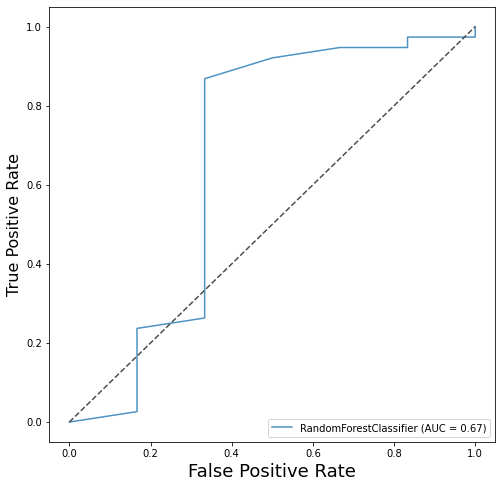

In [8]:
hd=pd.read_csv('../RNA_seq_for_autoimmune_disease/MS_bulk/GSE137143_MONO/GSE137143_hd_86_marker.csv',sep=',',index_col=0).T
ms=pd.read_csv('../RNA_seq_for_autoimmune_disease/MS_bulk/GSE137143_MONO/GSE137143_ms_86_marker.csv',sep=',',index_col=0).T
hd['patient']='0'
ms['patient']='1'
features=pd.read_csv('../three_gene_combined_markerset.csv',index_col=1)
features=np.append(features.index.values,'patient')
features=np.delete(features,[1,38])
df=pd.concat([ms,hd],axis=0)
label=df.patient.values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.drop(columns=['patient']),label,test_size=0.3)
rfc = RandomForestClassifier(random_state=0,class_weight='balanced')
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
c=pd.DataFrame(rfc.feature_importances_)
#a.index=df.columns.values
print("Random Forest:{}".format(score_r))
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, Xtest, Ytest, ax=ax, alpha=0.8)
plt.legend(loc=4,prop={'size': 10})
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=16)
ax.plot([0, 1], [0, 1], ls="--", c=".3")
plt.savefig("filename.png")
plt.show()


In [459]:
a['disease']='SLE'
b['disease']='RA'
c['disease']='MS'
pd.concat([a,b,c],axis=0).to_csv('../machine_learning/feature_importance_across_three_disease.csv')